In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score





In [9]:
# 1. Load dataset
df = pd.read_csv("personality_dataset.csv")

# 2. Cek dan tangani missing value
print("Jumlah missing value sebelum diproses:\n", df.isna().sum())

# Drop baris yang mengandung NaN
df.dropna(inplace=True)

Jumlah missing value sebelum diproses:
 Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [3]:
# 3. Encode fitur kategorikal
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [4]:
# 4. Pisahkan fitur dan target
X = df.drop(columns='Personality')
y = df['Personality']

# 5. Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [6]:

# Model
print("\nSVM RBF (C=10, gamma=0.1)")
svm = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"   Akurasi: {accuracy2:.4f}")




SVM RBF (C=10, gamma=0.1)
   Akurasi: 0.9274


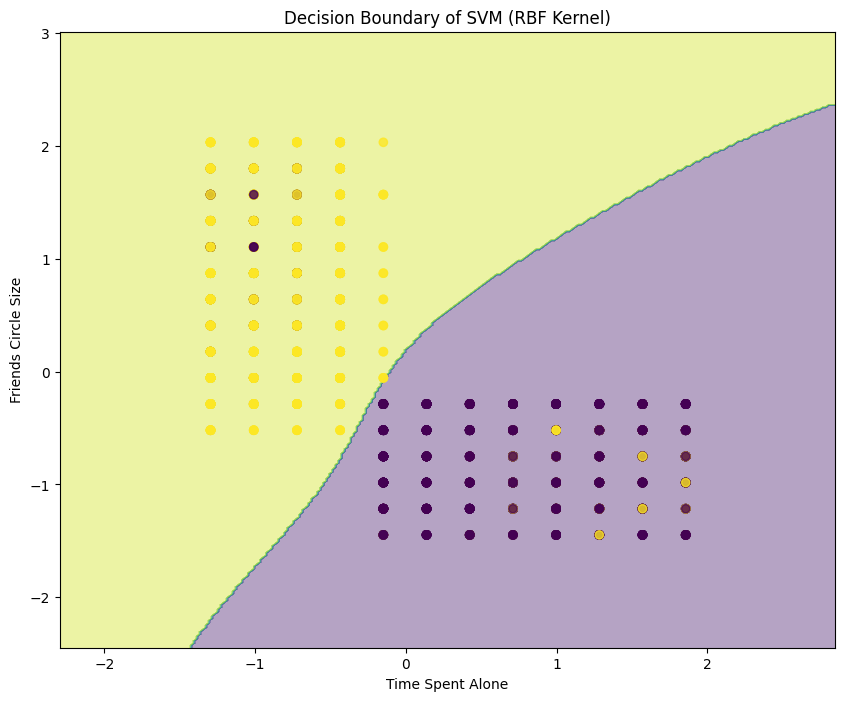


Akurasi model: 0.9253


In [7]:
# Buat mesh grid untuk plotting berdasarkan time_spent_alone dan friends_circle_size
x_min, x_max = X_scaled[:, df.columns.get_loc('Time_spent_Alone')].min() - 1, X_scaled[:, df.columns.get_loc('Time_spent_Alone')].max() + 1
y_min, y_max = X_scaled[:, df.columns.get_loc('Friends_circle_size')].min() - 1, X_scaled[:, df.columns.get_loc('Friends_circle_size')].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Transform mesh grid points ke ruang asli
mesh_points = np.zeros((len(xx.ravel()), X_scaled.shape[1]))
mesh_points[:, df.columns.get_loc('Time_spent_Alone')] = xx.ravel()
mesh_points[:, df.columns.get_loc('Friends_circle_size')] = yy.ravel()

# Prediksi untuk setiap titik di mesh grid
Z = svm.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_scaled[:, df.columns.get_loc('Time_spent_Alone')], 
           X_scaled[:, df.columns.get_loc('Friends_circle_size')], 
           c=y, alpha=0.8)
plt.xlabel('Time Spent Alone')
plt.ylabel('Friends Circle Size')
plt.title('Decision Boundary of SVM (RBF Kernel)')
plt.show()

# Tampilkan akurasi model
y_pred = svm.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print(f"\nAkurasi model: {accuracy:.4f}")


In [10]:
from sklearn.metrics import classification_report

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1203
           1       0.94      0.91      0.93      1274

    accuracy                           0.93      2477
   macro avg       0.93      0.93      0.93      2477
weighted avg       0.93      0.93      0.93      2477

